In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [3]:
df = pd.read_csv("./diabetes.csv")

## Random Forest

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.30,
                                                   random_state=42)

### Model & Tahmin

In [6]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

In [7]:
y_pred =rf_model.predict(X_test)

In [8]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [13]:
rf_params = {"n_estimators":[100,200,500,1000],
            "max_features":[3,5,7,8],
             "min_samples_split":[2,5,10,20]}

In [14]:
rf_cv_model =GridSearchCV(rf_model, rf_params,cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.2min finished


In [15]:
rf_cv_model.best_params_

{'max_features': 8, 'min_samples_split': 10, 'n_estimators': 200}

In [26]:
rf_tuned= RandomForestClassifier(max_features=8,min_samples_split=10,n_estimators=500).fit(X_train, y_train)

In [27]:
y_pred = rf_tuned.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.7489177489177489

In [29]:
#degisken önem düzeyleri

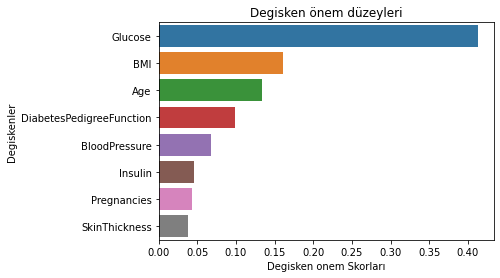

In [30]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Degisken onem Skorları')
plt.ylabel('Degiskenler')
plt.title("Degisken önem düzeyleri")
plt.show()